In [2]:
## import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc, log_loss

from mlxtend.plotting import plot_confusion_matrix

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import callbacks

In [5]:
print(os.getcwd())

/Users/lalebaksi/Desktop/DS_3rd_Phase


In [6]:
## directory_path = '../jpeg'
## print(os.path.exists(directory_path))

In [7]:
## parent_directory = '../jpeg'
## contents = os.listdir(parent_directory)
## print(contents)

In [8]:
def search_file(directory, filename):
    for root, dirs, files in os.walk(directory):
        if filename in files:
            return os.path.join(root, filename)
    return None

parent_directory = '../jpeg'
filename = '1-172.jpg'
file_path = search_file(parent_directory, filename)

if file_path:
    print("File found:", file_path)
else:
    print("File not found.")

File not found.


In [9]:
## in order to view all the mammogram jpeg images from the jpeg directory
## set a variable for the jpeg directory ''image_mam_pathway''
## os.listdir= obtains a list of all files and directories within the specified directory, checks with each file with jpeg, jpg.
## os.path.join= constructs the complete image path and proceeds to load and process each image individually

## use Pillow library for images

from PIL import Image
import os

## load the data for jpeg files for mammogram images
image_mam_pathway = "/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/jpeg"

for file_name in os.listdir(image_mam_pathway):
    if file_name.endswith(".jpg") or file_name.endswith(".jpeg"):
        image_mam_pathway = os.path.join(image_mam_pathway, file_name)
        image = Image.open(image_mam_pathway)
        # Perform operations with each loaded image
        # ...

In [10]:
## load the dicom dataset
patient_dicom_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/dicom_info.csv')

In [11]:
patient_dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [12]:
patient_dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [13]:
## link the images to the dicom path
## select the rows from the dataframe where Series Description column has 'cropped images'

patient_cropped_images= patient_dicom_data[patient_dicom_data.SeriesDescription == 'cropped images'].image_path
patient_cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [14]:
## use lambda function to replace it in dataframe as cropped images with the pathway and create a new series

patient_cropped_images = patient_cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_mam_pathway))
patient_cropped_images.head()

0     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
3     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
6     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
7     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
10    /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
Name: image_path, dtype: object

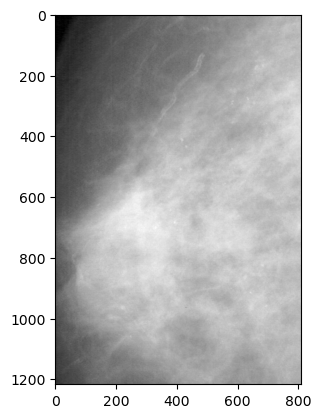

In [15]:
## load the images from the newly created list of patient_cropped_images
## convert them to grayscale for display

for file  in patient_cropped_images[0:5]:
  patient_cropped_images_show = PIL.Image.open(file)
  gray_img= patient_cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [16]:
## link the images to the dicom path
## select the rows from the dataframe where Series Description column has 'full mammogram images'

patient_full_mammogram_images=patient_dicom_data[patient_dicom_data.SeriesDescription == 'full mammogram images'].image_path
patient_full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [17]:
## use lambda function to replace it in dataframe as full mammogram images with the pathway and create a new series

patient_full_mammogram_images = patient_full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_mam_pathway))
patient_full_mammogram_images.head()

1     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
2     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
11    /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
12    /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
15    /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
Name: image_path, dtype: object

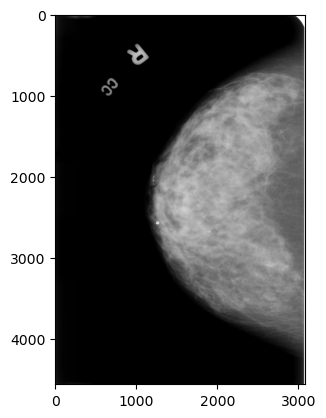

In [18]:
## load the images from the newly created list of patient_full_mammogram_images
## convert them to grayscale for display

for file  in patient_full_mammogram_images[0:5]:
  patient_full_mammogram_images_show = PIL.Image.open(file)
  gray_img= patient_full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [19]:
## link the images to the dicom path
## select the rows from the dataframe where Series Description column has 'ROI mask images'(region of interest)

patient_ROI_mask_images=patient_dicom_data[patient_dicom_data.SeriesDescription == 'ROI mask images'].image_path
patient_ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [20]:
## use lambda function to replace it in dataframe as ROI mask images with the pathway and create a new series

patient_ROI_mask_images = patient_ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_mam_pathway))
patient_ROI_mask_images.head()

5     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
8     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
9     /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
14    /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
20    /Users/lalebaksi/Desktop/DS_3rd_Phase/archive ...
Name: image_path, dtype: object

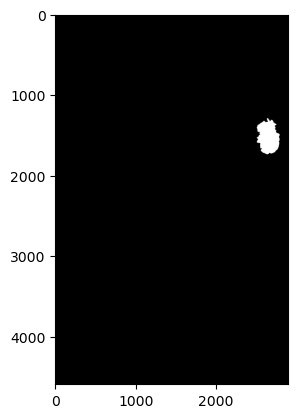

In [21]:
## load the images from the newly created list of ROI_mask_images
## convert them to grayscale for display

for file  in patient_ROI_mask_images[0:5]:
  patient_ROI_mask_images_show = PIL.Image.open(file)
  gray_img= patient_ROI_mask_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [22]:
## load the calc_train dataset
patient_calc_train_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/calc_case_description_train_set.csv')

In [23]:
patient_calc_train_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,Unnamed: 14
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,NaN
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,NaN
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,NaN
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,NaN
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,NaN


DEFINITIONS;

BREAST DENSITY= refers to the proportion of different types of tissues present in the breast, primarily glandular tissue and fatty tissue.
    Breast Density is categorized into four main types;
    1-Fatty: The breast is composed mostly of fatty tissue, with little glandular tissue. Fatty breast density appears as a mostly dark area on a mammogram.
    2-Scattered Fibroglandular: The breast has a mix of fatty and glandular tissue, with scattered areas of dense tissue. Scattered fibroglandular breast density appears as a mixture of lighter and darker areas on a mammogram.
    3-Heterogeneously Dense: The breast has a significant amount of glandular tissue, resulting in a dense appearance on the mammogram. Heterogeneously dense breast density appears as mostly lighter areas on the mammogram.
    4-Extremely Dense: The breast has a high proportion of glandular tissue, making it extremely dense. Extremely dense breast density appears as mostly white areas on the mammogram.

IMAGE VIEW= MLO and CC refer to projections used to capture image of the breast during a mammogram.
    1-CC: Cranio-caudal view is an X-ray image taken with the breast compressed between two plates in a top to bottom direction, two dimensional image of the breast from a side view perspective.
    2-MLO: Medio lateral Oblique view is an X-ray image taken with the breast compressed between two plates in an angled direction, two dimensional image of the breast from an oblique view perspective.

ABNORMALITY TYPE= refers to the classification of abnormalities observed in diagnostic imaging studies such as mammograms, CT scans, MRI scans, X-rays. Abnormality type can vary depending on the specific imaging modality and the area of the body being examined.
    1-Mass or Tumor: refers to an abnormal growth or accumulation of cells that can be either benign(non-cancerous) or malignant(cancerous).  They could appear as solid or fluid-filled structures.
    2-Calcifications: are tiny deposits of calcium that can appear as white spots or speks on an imaging study.  These can be indicative of various conditions such as benign changes, precancerous lesions or early stage breast cancer.
    

CALC TYPE= calcium deposits in the breast can be categorized into different types based on their appearance. they are generally split into two types, microcalcifications and macrocalcifications.  Both types are usually benign, but occasionally microcalcifications can be an early sign of breast cancer.  The main types are as follows.
    1-Amorphous: These are defined as without a clearly defined shape or form and are usually very small or hazy in appearance and are considered immediate concern
    2-Coarse: calcifications that are generally largen than 0.5mm and are considered to be of immediate concern.
    3-Pleomorphic: They exhibit marked variability in their nuclear size, shape, and staining patterns, significant genetic alterations and abnormal cell growth. They are more conspicuous than the amorphic calcifications.  There is a 25-40% risk of malignancy.
    4-Punctate: They are usually very small in size, measuring a few millimeters or less. Factors such as the number, size, shape, and clustering of punctate calcifications, as well as the presence of associated features like architectural distortion or suspicious patterns, help guide the diagnostic process.
    5-Lucent: These are round or oval calcifications that range from under 1 mm to over a centimeter. They are the result of fat necrosis, calcified debris in ducts, and occasional fibroadenomas.
    6-Fine Linear: These are thin, linear or curvilinear irregular calcifications. Their appearance suggests filling of the lumen of a duct
    There are several more types of calcifications but the above are most found in breast imaging. 


CALC DISTRIBUTION= can provide information about the calcifications underlying causes and their significance for breast health.
    1-Clustered: refers to the presence of calcifications grouped closely together in a concentrated area. They form clusters or clusters of microcalcifications, often appearing as dense spots or clusters on the mammogram.
    2-Linear: refers to the presence of calcifications arranged in a linear or branching pattern. They may form lines or branches across the breast tissue.
    3-Segmental: refers to the presence of calcifications in a well-defined segment or section of the breast. They are localized to a specific region and may indicate changes or abnormalities within that segment.
    4-Regional: refers to the presence of calcifications in a specific region or quadrant of the breast. They are limited to a particular area and may indicate localized changes or conditions.
    5-Diffuse: refers to the presence of calcifications scattered throughout the breast tissue. They are evenly distributed and can be seen across multiple areas of the breast.

MASS DISTRIBUTION= refers to the pattern or location of masses or tumors within the breast tissue. It describes how the cancerous mass or tumor is distributed or spread throughout the breast. 
    1-Focal or Localized: refers to the presence of a single dominant mass or tumor in a specified area of the breast and does not extent beyond that specific area, generally seen in early-stage breast cancer.
    2-Regional: refers to the presence of muliple masses or tumors within a specified region of the breast, they are limited to a defined area and may be next to each other within that region. This type of distribution may indicate more advanced stage of breast cancer.
    3-Multifocal: refers to the presence of multiple masses or tumors in different parts of the same breast. They are very distinct and seperate from each other, they may occur in different regions of the breast.  This type is associated with multicentric disease where there are multiple independent primary tumors within the breast.
    4-Diffuse or Disseminated: refers to the presence of multiple masses or tumors scattered throughout the breast tissue without a clear pattern or a defined area. This is often seen in more advanced or metastatic breast cancer.

MASS SHAPE= refers to the different geometric appearances of masses or tumors detected in breast imagings. The sahpe of the mass provides info about the charateristics and potential malignancy.
    1-Oval: the mass has a rounded or elongated shape with smooth and well-defined borders.  It is either benign or early-stage cancerous mass.
    2-Round: round or circular mass has a symmetrical round and evenly shaped with smooth borders. Generally defined as a benign mass but very rarely cancerous masses may have this shape as well.
    3-Irregular: lacks a well defined shape or clear borders, has an irregular contour with jagged or spiculated edges.  This shape is a concern for cancer.
    4-Lobulated: it has multiple lobes or smaller components with the larger mass. It could appear as if the mass is composed of distinct lobes.  This shape could be benign or malignant.
    5-Focal asymmetric density: An area of increased density in one of your breasts compared with the same part in the other breast.
    6-Architectural Distortion: Disruption or distortion of the normal linear or spiculated patterns of breast tissue.The distortion can be seen in focal areas of retraction, pulling or the distortion of the surrounding tissue.
    7-Asymmetric breast tissue: Two breasts have noticibly different size, shape or appearance. There is asymmetry between the left and right breasts in terms of the overall size, volume or distribution of glandular and fibrous tissue.
    8-Lymph Node: Small, bean shaped structures that are part of the lymphatic system that helps the body fighting infections and filtering out any harmful substances. These should be checked to prevent breast cancer spreading through the lympahatic system to nearby lymph nodes.  Detecting cancer cells in the lymph nodes help determine the satge of breast cancer.


MASS MARGINS: refers to the appearance and characteristics of the edges or borders of a breast mass or tumor.  Evaluation of mass margin enables to determine the difference between benign and malignant cells.
    1-Circumscribed (well defined): it has a clear and distinct borders that are easily distinguishable from the surrounding breast tissue.Generally associated with benign masses.
    2-Microbulated: it has very subtle or tiny lobes or irregularities within its borders.  It may be an early-stage breast cancer sign. 
    3-Obscured: it indicates that there is limited visibility or clarity in defining the exact boundaries of the mass.  This can occur when there is overlapping dense breast tissue. More commonly associated with malignant masses in aggressive breast cancer.
    4-Ill-defined (indistinct): lack of clear and well defined borders. The edges of the mass may be blurry or merged with surrounding breast tissue. This is often indicates malignant cells.
    5-Spiculated (irregular): presence of radiating lines or spikes extending from the edges of the mass. The margin appears jagged or rough, indicating potential invasive behavior and often a sign of aggressive breast cancer.
    
ASSESSMENT= grades for mammograms are a standardized way to categorize and communicate the findings of a mammogram examination such as any levels of suspicion or concern regarding any abnormalities or potential breast health issues detected.  BI-RADS system is widely used for mammogram reporting and categorizes findings into six categories;
    0- incomplete assessment, further imaging is needed.
    1- negative or normal findings.
    2- benign(non-cancerous) finding, no significant concern.
    3- probably beningn findings, follow-up recommendeded.
    4- suspicious findings, further diagnostic evaluation is warranted.
    5- highly suspicious of malignancy, further evaluation and biopsy are recommended.
    6- known biopsy proven malignancy, already diagnosed as cancer.

PATHOLOGY= it involves the examination of breast tissue samples to identify and diagnose various breast conditions, including benign changes, precancerous lesions, and breast cancer. When a mammogram detects an abnormality, such as a suspicious mass or calcifications, further diagnostic evaluation may be required to determine the nature of the abnormality. This typically involves additional imaging studies, such as diagnostic mammograms, ultrasound, or magnetic resonance imaging (MRI). If the imaging findings raise concerns, a biopsy may be recommended to obtain a sample of breast tissue for pathological analysis.  During a biopsy, a small tissue sample is collected from the area of interest, such as the suspicious mass or calcifications, and sent to a pathology laboratory for examination. Pathologists study the tissue samples under a microscope and perform various tests to determine the presence or absence of cancer, evaluate the characteristics of the abnormality, and provide a diagnosis. The pathology reports the following results;
    1-Benign: examined tissue sample does not show any signs of malignancy or cancer.  It confirms that the abnormality is non-cancerous.
    2-Atypical: examined tissue sample exhibits certain architectural features that are not entirely normal but fall short of a definitive diagnosis of malignancy.  This result may require monitoring or further evaluation to assess the risk of progression to cancer.
    3-In stu carcinoma: presence of abnormal cells confined within the milk ducts or lobules of the breast without invading the surrounding tissue.  Ductal carcinoma in stu or lobular carcinoma in stu are the examples for this type.
    4-Invasive carcinoma: presence of cancerous cells that have penetrated the basement membrane of the ducts or lobules and invaded the surrounding breast tissue. Invasive breast cancer may include various subtypes such as invasive ductal carcinoma or invasive lobular carcinoma.
    5-Metastic carcinoma: presence of cancerous cells that have spread to other parts of the body from the breast such as lymph nodes or distant organs. 

SUBTLETY= refers to the degree or level of difficulty in detecting or characterizing abnormalities or findings in a mammogram or other breast imaging studies. It describes how challenging it may be for radiologists or healthcare professionals to identify and interpret certain features or changes in the breast tissue.  Breast imaging can present various levels of subtlety, depending on factors such as the size, location, shape, density, and appearance of the abnormalities. Some findings may be more conspicuous or obvious, while others can be more subtle and require careful scrutiny or additional imaging techniques for accurate detection and interpretation.  There isn't a universally standardized subtlety grading system.
    Grade 1: obvious or easily recognized findings. These are typically large, distinct and easily identified.
    Grade 2: moderately subtle findings, they may be less obvious and require closer attention and analysis to detect and interpret accurately.
    Grade 3: subtle findings, they are more challenging to detect and may require additional imaging views or expert interpretation
    Grade 4: very subtle findings, they are significantly challenging to detect and may require specialized expertise, advanced imaging techniques.
    Grade 5: exceptionally elusive and challenging to identify even for experienced radiologists or medical experts.


In [24]:
patient_calc_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               1546 non-null   object 
 1   breast density           1546 non-null   int64  
 2   left or right breast     1546 non-null   object 
 3   image view               1546 non-null   object 
 4   abnormality id           1546 non-null   int64  
 5   abnormality type         1546 non-null   object 
 6   calc type                1526 non-null   object 
 7   calc distribution        1170 non-null   object 
 8   assessment               1546 non-null   int64  
 9   pathology                1546 non-null   object 
 10  subtlety                 1546 non-null   int64  
 11  image file path          1546 non-null   object 
 12  cropped image file path  1546 non-null   object 
 13  ROI mask file path       1546 non-null   object 
 14  Unnamed: 14             

In [25]:
patient_calc_train_data.describe()

,breast density,abnormality id,assessment,subtlety,Unnamed: 14
count,1546.000000,1546.000000,1546.000000,1546.000000,0.0
mean,2.663648,1.415265,3.258732,3.411384,NaN
std,0.937219,0.903571,1.229231,1.179754,NaN
min,1.000000,1.000000,0.000000,1.000000,NaN
25%,2.000000,1.000000,2.000000,3.000000,NaN
50%,3.000000,1.000000,4.000000,3.000000,NaN
75%,3.000000,1.000000,4.000000,4.000000,NaN
max,4.000000,7.000000,5.000000,5.000000,NaN


In [26]:
## load the mass_train dataset
patient_mass_train_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/mass_case_description_train_set.csv')

In [27]:
patient_mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [28]:
patient_mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [29]:
patient_mass_train_data.describe()

,breast_density,abnormality id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [30]:
patient_dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [31]:
## drop columns in patient_dicom_data that have no data - no need to fill in as they are completely empty
patient_dicom_data.drop(['AccessionNumber', 'PatientBirthDate', 'PatientSex', 'ReferringPhysicianName'], axis=1, inplace=True)

In [32]:
patient_dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   BitsAllocated                                10237 non-null  int64  
 3   BitsStored                                   10237 non-null  int64  
 4   BodyPartExamined                             10237 non-null  object 
 5   Columns                                      10237 non-null  int64  
 6   ContentDate                                  10237 non-null  int64  
 7   ContentTime                                  10237 non-null  float64
 8   ConversionType                               10237 non-null  object 
 9   HighBit                                      10237 non-null  int64  
 10

In [33]:
## drop the columns that we dont need 
## do I need Study Date/Time/Instance/ID - drop them
patient_dicom_data.drop(['StudyDate', 'StudyTime', 'StudyInstanceUID', 'StudyID'], axis=1, inplace=True)
patient_dicom_data.drop(['Columns', 'ContentDate', 'ContentTime', 'InstanceNumber', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SeriesInstanceUID', 'SeriesNumber'], axis=1, inplace=True)

In [34]:
## are there any missing data in the dataset?
patient_dicom_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [35]:
## fill in the missing data for Laterality and Series Description
## use the 'bfill' method=  replaces missing values with the next available non-null value from the subsequent row.

patient_dicom_data['Laterality'].fillna(method='bfill', axis=0, inplace=True)
patient_dicom_data['SeriesDescription'].fillna(method='bfill', axis=0, inplace=True)

In [36]:
patient_dicom_data.isnull().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [37]:
## check if there are any missing values in patient_calc_train_data
patient_calc_train_data.isnull().sum()

patient_id                    0
breast density                0
left or right breast          0
image view                    0
abnormality id                0
abnormality type              0
calc type                    20
calc distribution           376
assessment                    0
pathology                     0
subtlety                      0
image file path               0
cropped image file path       0
ROI mask file path            0
Unnamed: 14                1546
dtype: int64

In [38]:
## fill the missing values with 'bfill' again as previously used
## fill missing values for calc type and calc distribution

patient_calc_train_data['calc type'].fillna(method='bfill', axis=0, inplace=True)
patient_calc_train_data['calc distribution'].fillna(method='bfill', axis=0, inplace=True)

In [39]:
## check again
patient_calc_train_data.isnull().sum()

patient_id                    0
breast density                0
left or right breast          0
image view                    0
abnormality id                0
abnormality type              0
calc type                     0
calc distribution             0
assessment                    0
pathology                     0
subtlety                      0
image file path               0
cropped image file path       0
ROI mask file path            0
Unnamed: 14                1546
dtype: int64

In [40]:
## drop unnamed column as it appeared from nowhere??

patient_calc_train_data.drop(['Unnamed: 14'], axis=1, inplace=True)

In [41]:
## check the data types
patient_calc_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1546 non-null   object
 7   calc distribution        1546 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [42]:
## change object types to category type to enable encoding
patient_calc_train_data['left or right breast']= patient_calc_train_data['left or right breast'].astype('category')
patient_calc_train_data['image view']= patient_calc_train_data['image view'].astype('category')
patient_calc_train_data['abnormality type']= patient_calc_train_data['abnormality type'].astype('category')
patient_calc_train_data['calc type']= patient_calc_train_data['calc type'].astype('category')
patient_calc_train_data['calc distribution']= patient_calc_train_data['calc distribution'].astype('category')
patient_calc_train_data['pathology']= patient_calc_train_data['pathology'].astype('category')


In [43]:
## check that chosen data types have changed to category
patient_calc_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast density           1546 non-null   int64   
 2   left or right breast     1546 non-null   category
 3   image view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality type         1546 non-null   category
 6   calc type                1546 non-null   category
 7   calc distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [44]:
## check the missing values for patient_mass_train data
patient_mass_train_data.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [45]:
## fill the data for mass shape and mass margins
patient_mass_train_data['mass shape'].fillna(method='bfill', axis=0, inplace=True)
patient_mass_train_data['mass margins'].fillna(method='bfill', axis=0, inplace=True)


In [46]:
## check if missing values are filled
patient_mass_train_data.isnull().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [47]:
## check the data types
patient_mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1318 non-null   object
 7   mass margins             1318 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [48]:
## convert the data types of object to category, as same as calc_train data for encoding
patient_mass_train_data['left or right breast']= patient_mass_train_data['left or right breast'].astype('category')
patient_mass_train_data['image view']= patient_mass_train_data['image view'].astype('category')
patient_mass_train_data['abnormality type']= patient_mass_train_data['abnormality type'].astype('category')
patient_mass_train_data['mass shape']= patient_mass_train_data['mass shape'].astype('category')
patient_mass_train_data['mass margins']= patient_mass_train_data['mass margins'].astype('category')
patient_mass_train_data['pathology']= patient_mass_train_data['pathology'].astype('category')


In [49]:
## check again for data types
patient_mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left or right breast     1318 non-null   category
 3   image view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality type         1318 non-null   category
 6   mass shape               1318 non-null   category
 7   mass margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

DATA VISUALISATIONS

In [50]:
## check how many different types of images in dicom_data
series_dicom= pd.DataFrame(patient_dicom_data['SeriesDescription'].value_counts())
series_dicom= series_dicom.reset_index()
series_dicom= series_dicom.rename(columns= {'SeriesDescription': 'No_SeriesDescription', 'index': 'SeriesDescription'})
series_dicom

,SeriesDescription,No_SeriesDescription
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [51]:
## plot the series
series_dicom_graph=px.bar(data_frame=series_dicom, x='SeriesDescription', y='No_SeriesDescription', color='SeriesDescription')
series_dicom_graph


In [52]:
## check which side of breast most examined
bodypart_dicom= pd.DataFrame(patient_dicom_data['BodyPartExamined'].value_counts())
bodypart_dicom= bodypart_dicom.reset_index()
bodypart_dicom= bodypart_dicom.rename(columns= {'BodyPartExamined': 'No_BodyPartExamined', 'index': 'Which BodyPart Examined'})
bodypart_dicom

,Which BodyPart Examined,No_BodyPartExamined
0,BREAST,9671
1,Left Breast,318
2,Right Breast,248


In [53]:
## plot the data
bodypart_dicom_graph=px.bar(data_frame=bodypart_dicom, x='Which BodyPart Examined', y='No_BodyPartExamined', color='Which BodyPart Examined')
bodypart_dicom_graph

In [54]:
## check patient  - image type
orient_dicom= pd.DataFrame(patient_dicom_data['PatientOrientation'].value_counts())
orient_dicom= orient_dicom.reset_index()
orient_dicom= orient_dicom.rename(columns= {'PatientOrientation': 'No_PatientOrientation', 'index': 'PatientOrientation'})
orient_dicom

,PatientOrientation,No_PatientOrientation
0,MLO,5434
1,CC,4803


In [55]:
## plot the orientation
orient_dicom_graph=px.bar(data_frame=orient_dicom, x='PatientOrientation', y='No_PatientOrientation', color='PatientOrientation')
orient_dicom_graph

In [56]:
## check the calc_types in patient_calc dataset
## how many types are in that and what is the biggest?

calctype_calc_train_data= pd.DataFrame(patient_calc_train_data['calc type'].value_counts())
calctype_calc_train_data= calctype_calc_train_data.reset_index()
calctype_calc_train_data= calctype_calc_train_data.rename(columns={'calc type': 'No_Calc Types'})
calctype_calc_train_data

,index,No_Calc Types
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


In [57]:
## plot the calc types
calctype_calc_graph= px.bar(data_frame=calctype_calc_train_data, x='No_Calc Types', y='index', color='index')
calctype_calc_graph

In [58]:
## what about the calc_distribution? how many different types in this?
calcdistr_calc= pd.DataFrame(patient_calc_train_data['calc distribution'].value_counts())
calcdistr_calc= calcdistr_calc.reset_index()
calcdistr_calc= calcdistr_calc.rename(columns={'calc distribution': 'No_Calc Distribution'})
calcdistr_calc

,index,No_Calc Distribution
0,CLUSTERED,1000
1,SEGMENTAL,214
2,REGIONAL,118
3,LINEAR,111
4,CLUSTERED-LINEAR,49
5,DIFFUSELY_SCATTERED,43
6,CLUSTERED-SEGMENTAL,5
7,LINEAR-SEGMENTAL,5
8,REGIONAL-REGIONAL,1


In [59]:
## plot the distribution types
calcdistr_calc_graph= px.bar(data_frame=calcdistr_calc, y='No_Calc Distribution', x='index', color='index', orientation='v')
calcdistr_calc_graph.update_layout(title='Distribution of Calcification Cancer', title_x=0.5, yaxis=dict(type='log'))
calcdistr_calc_graph

In [60]:
## check the breast density information
## how many types are there?
bdensity_calc= pd.DataFrame(patient_calc_train_data['breast density'].value_counts())
bdensity_calc= bdensity_calc.reset_index()
bdensity_calc= bdensity_calc.rename(columns={'breast density': 'No_Breast Density Types', 'index': 'Breast Density Type'})
bdensity_calc

,Breast Density Type,No_Breast Density Types
0,3,539
1,2,501
2,4,331
3,1,175


In [61]:
## plot the breast density types
bdensity_calc_graph= px.bar(data_frame=bdensity_calc, y='No_Breast Density Types', x='Breast Density Type', color='Breast Density Type')
bdensity_calc_graph.update_layout(title='Breast Density Types', title_x=0.5, yaxis=dict(type='log'))
bdensity_calc_graph

In [62]:
abnorm_calc= pd.DataFrame(patient_calc_train_data['abnormality type'].value_counts())
abnorm_calc

,abnormality type
calcification,1546


In [63]:
abnormId_calc=pd.DataFrame(patient_calc_train_data['abnormality id'].value_counts())
abnormId_calc

,abnormality id
1,1172
2,219
3,88
4,35
5,20
6,10
7,2


In [64]:
abnorm_mass= pd.DataFrame(patient_mass_train_data['abnormality type'].value_counts())
abnorm_mass

,abnormality type
mass,1318


In [65]:
## check assessment and pathology
assessm_calc= pd.DataFrame(patient_calc_train_data['assessment'].value_counts())
assessm_calc= assessm_calc.reset_index()
assessm_calc= assessm_calc.rename(columns={'assessment': 'No_Assessments', 'index': 'Breast Assessment'})
assessm_calc

,Breast Assessment,No_Assessments
0,4,753
1,2,482
2,5,159
3,3,89
4,0,63


### try modelling for mass cases

In [66]:
## upload mass test data

patient_mass_test_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/mass_case_description_test_set.csv')

In [67]:
## check the missing values for patient_mass_test data
patient_mass_test_data.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [68]:
## replace missing values for mass margins
## use bfill method as previously 
patient_mass_test_data['mass margins'].fillna(method='bfill', axis=0, inplace=True)

In [69]:
## check if missing values are filled
patient_mass_test_data.isnull().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [70]:
## check the info on the data
patient_mass_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             378 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

In [71]:
## convert the data types of object to category, as same as calc_train data
patient_mass_test_data['left or right breast']= patient_mass_test_data['left or right breast'].astype('category')
patient_mass_test_data['image view']= patient_mass_test_data['image view'].astype('category')
patient_mass_test_data['abnormality type']= patient_mass_test_data['abnormality type'].astype('category')
patient_mass_test_data['mass shape']= patient_mass_test_data['mass shape'].astype('category')
patient_mass_test_data['mass margins']= patient_mass_test_data['mass margins'].astype('category')
patient_mass_test_data['pathology']= patient_mass_test_data['pathology'].astype('category')


In [72]:
## check again for updated data types
patient_mass_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               378 non-null    object  
 1   breast_density           378 non-null    int64   
 2   left or right breast     378 non-null    category
 3   image view               378 non-null    category
 4   abnormality id           378 non-null    int64   
 5   abnormality type         378 non-null    category
 6   mass shape               378 non-null    category
 7   mass margins             378 non-null    category
 8   assessment               378 non-null    int64   
 9   pathology                378 non-null    category
 10  subtlety                 378 non-null    int64   
 11  image file path          378 non-null    object  
 12  cropped image file path  378 non-null    object  
 13  ROI mask file path       378 non-null    object  
dtypes: categor

In [73]:
patient_mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left or right breast     1318 non-null   category
 3   image view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality type         1318 non-null   category
 6   mass shape               1318 non-null   category
 7   mass margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

In [74]:
## now that we have correct data types in mass_train and mass_test datasets, we can start modelling

In [75]:
## first combine the two datasets
## define the variables
## then split pathology for test/train

import pandas as pd
mass_full_data= pd.concat((patient_mass_train_data, patient_mass_test_data), axis=0, ignore_index=True)


In [76]:
mass_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1696 non-null   object  
 1   breast_density           1696 non-null   int64   
 2   left or right breast     1696 non-null   category
 3   image view               1696 non-null   category
 4   abnormality id           1696 non-null   int64   
 5   abnormality type         1696 non-null   category
 6   mass shape               1696 non-null   object  
 7   mass margins             1696 non-null   object  
 8   assessment               1696 non-null   int64   
 9   pathology                1696 non-null   category
 10  subtlety                 1696 non-null   int64   
 11  image file path          1696 non-null   object  
 12  cropped image file path  1696 non-null   object  
 13  ROI mask file path       1696 non-null   object  
dtypes: categ

In [77]:
## check the mass shapes 
shape_mass_full_data= pd.DataFrame(mass_full_data['mass shape'].value_counts())
shape_mass_full_data= shape_mass_full_data.reset_index()
shape_mass_full_data= shape_mass_full_data.rename(columns={'calc type': 'No_Calc Types'})
shape_mass_full_data

,index,mass shape
0,IRREGULAR,464
1,OVAL,414
2,LOBULATED,384
3,ROUND,164
4,ARCHITECTURAL_DISTORTION,103
5,IRREGULAR-ARCHITECTURAL_DISTORTION,54
6,LYMPH_NODE,35
7,ASYMMETRIC_BREAST_TISSUE,25
8,FOCAL_ASYMMETRIC_DENSITY,25
9,LOBULATED-IRREGULAR,6


In [78]:
## plot the mass shapes
shape_mass_full_data_graph= px.bar(data_frame=shape_mass_full_data, x='mass shape', y='index', color='index')
shape_mass_full_data_graph

In [79]:
## how many different types in mass margins?
margins_mass_full_data= pd.DataFrame(mass_full_data['mass margins'].value_counts())
margins_mass_full_data= margins_mass_full_data.reset_index()
margins_mass_full_data= margins_mass_full_data.rename(columns={'mass margins': 'No_of Mass Margins'})
margins_mass_full_data

,index,No_of Mass Margins
0,CIRCUMSCRIBED,397
1,SPICULATED,386
2,ILL_DEFINED,384
3,OBSCURED,252
4,MICROLOBULATED,134
5,ILL_DEFINED-SPICULATED,31
6,CIRCUMSCRIBED-ILL_DEFINED,29
7,OBSCURED-ILL_DEFINED,24
8,CIRCUMSCRIBED-OBSCURED,22
9,CIRCUMSCRIBED-SPICULATED,7


In [80]:
## plot the distribution types
margins_mass_full_data_graph= px.bar(data_frame= margins_mass_full_data, x= 'No_of Mass Margins', y= 'index', color='index')
##margins_mass_full_data_graph.update_layout(title='Types of Mass Margins', title_x=0.5, yaxis=dict(type='log'))
margins_mass_full_data_graph

In [81]:
## rename pathology and left or right breast

mass_full_data['new_pathology']= np.where(mass_full_data['pathology'] == 'MALIGNANT', 1, 0)
mass_full_data['lr_breast']= np.where(mass_full_data['left or right breast'] == 'RIGHT', 1, 0)


In [82]:
## change mass margins to values

margins_conditions = [
    mass_full_data['mass margins'] == 'CIRCUMSCRIBED',
    mass_full_data['mass margins'] == 'SPICULATED',
    mass_full_data['mass margins'] == 'ILL_DEFINED',
    mass_full_data['mass margins'] == 'OBSCURED',
    mass_full_data['mass margins'] == 'MICROBULATED'
]

margins_choices= [0, 1, 2, 3, 4]
mass_full_data['new_mass_margins']= np.select(margins_conditions, margins_choices, default=5)

In [83]:
## change mass shape to values

shape_conditions = [
    mass_full_data['mass shape'] == 'IRREGULAR',
    mass_full_data['mass shape'] == 'OVAL',
    mass_full_data['mass shape'] == 'LOBULATED',
    mass_full_data['mass shape'] == 'ROUND',
]

shape_choices= [0, 1, 2, 3]
mass_full_data['new_mass_shape']= np.select(shape_conditions, shape_choices, default=4)

In [84]:
## change the Patient ID to a value
## get unique patient ids from the dataset

patient_ids= mass_full_data['patient_id'].unique()
value_mapping = {}
value= 0

for patient_id in patient_ids:
    value_mapping[patient_id]= value
    value += 1

mass_full_data['new_patient_id']= mass_full_data['patient_id'].map(value_mapping)


In [85]:
mass_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1696 non-null   object  
 1   breast_density           1696 non-null   int64   
 2   left or right breast     1696 non-null   category
 3   image view               1696 non-null   category
 4   abnormality id           1696 non-null   int64   
 5   abnormality type         1696 non-null   category
 6   mass shape               1696 non-null   object  
 7   mass margins             1696 non-null   object  
 8   assessment               1696 non-null   int64   
 9   pathology                1696 non-null   category
 10  subtlety                 1696 non-null   int64   
 11  image file path          1696 non-null   object  
 12  cropped image file path  1696 non-null   object  
 13  ROI mask file path       1696 non-null   object  
 14  new_path

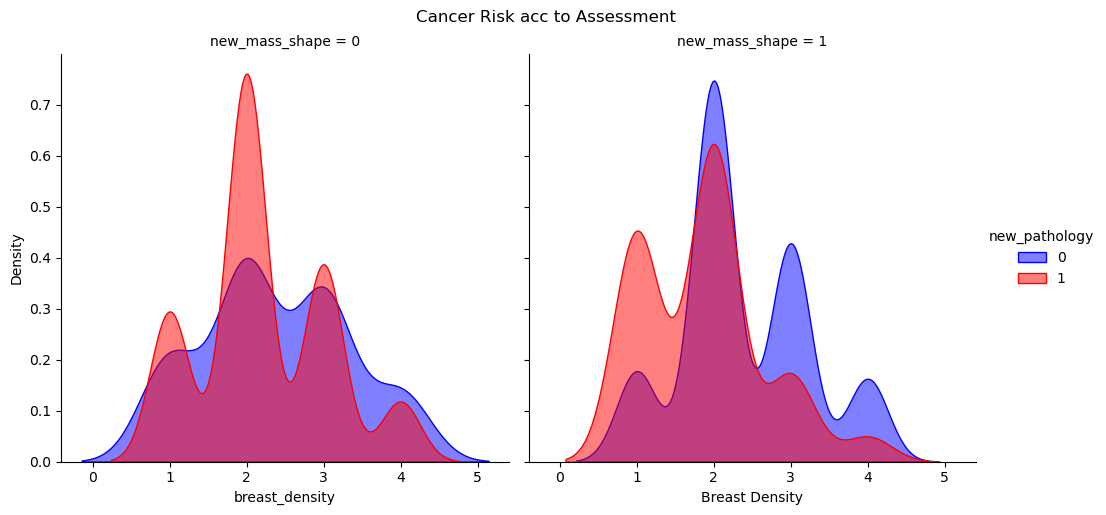

In [91]:
## plot for mass shape vs density vs pathology
## create a FacetGrid first
mshape_bdensity_path = sns.FacetGrid(data=mass_full_data, col='new_mass_shape', hue='new_pathology', hue_order=[0, 1], col_order=[0, 1], palette=['blue', 'red'], height=5, aspect=1)

## then plot the KDE for 'assessment' on each facet
mshape_bdensity_path.map_dataframe(sns.kdeplot, x='breast_density', fill=True, alpha=0.5, common_norm=False)

mshape_bdensity_path.add_legend()
mshape_bdensity_path.fig.suptitle('Cancer Risk acc to Assessment', y=1.02)
plt.xlabel('Breast Density')
plt.ylabel('Density')
plt.show()

In [ ]:
## save the file to csv to use it on another notebook
mass_full_data.to_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/Mass_Combined Breast Cancer Data.csv', index=False)

In [ ]:
mass_full_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,new_pathology,lr_breast,new_mass_margins,new_mass_shape,new_patient_id
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,1,0,1,4,0
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,1,0,1,4,0
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,0,0,2,4,1
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,0,0,2,4,1
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,0,1,0,1,1


In [ ]:
X= mass_full_data.drop(['pathology', 'new_pathology', 'left or right breast', 'mass margins', 'mass shape', 'abnormality type', 'image view', 'patient_id', 'image file path', 'cropped image file path', 'ROI mask file path'], axis=1)
Y= mass_full_data['new_pathology']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   breast_density    1696 non-null   int64
 1   abnormality id    1696 non-null   int64
 2   assessment        1696 non-null   int64
 3   subtlety          1696 non-null   int64
 4   lr_breast         1696 non-null   int64
 5   new_mass_margins  1696 non-null   int64
 6   new_mass_shape    1696 non-null   int64
 7   new_patient_id    1696 non-null   int64
dtypes: int64(8)
memory usage: 106.1 KB


In [ ]:
X.head()

,breast_density,abnormality id,assessment,subtlety,lr_breast,new_mass_margins,new_mass_shape,new_patient_id
0,3,1,4,4,0,1,4,0
1,3,1,4,4,0,1,4,0
2,3,1,4,3,0,2,4,1
3,3,1,4,3,0,2,4,1
4,3,1,4,5,1,0,1,1


In [ ]:
X.tail()

,breast_density,abnormality id,assessment,subtlety,lr_breast,new_mass_margins,new_mass_shape,new_patient_id
1691,2,1,3,3,1,5,2,888
1692,2,1,5,5,1,2,0,889
1693,2,1,4,2,0,2,0,890
1694,3,1,5,4,1,1,0,891
1695,3,1,5,4,1,1,0,891


In [ ]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: new_pathology, dtype: int64

In [ ]:
Y.tail()

1691    0
1692    1
1693    1
1694    1
1695    1
Name: new_pathology, dtype: int64

In [ ]:
## split my variables for train and test variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=32)
print('X_train size is:', X_train.shape)
print('X_test size is:', X_test.shape)
print('Y_train size is:', Y_train.shape)
print('Y_test size is:', Y_test.shape)



X_train size is: (1356, 8)
X_test size is: (340, 8)
Y_train size is: (1356,)
Y_test size is: (340,)


In [ ]:
scaler_x = StandardScaler()
X_train= scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:

## apply early stopping
## this will prevent to overrun the data for unnecessary epochs

early_stopping= callbacks.EarlyStopping(
    min_delta=0.01,
    patience=10,
    restore_best_weights=True)

In [ ]:
## set up a simple ANN model for cancer detection

mass_model= Sequential()
mass_model.add(Dense(units=16, kernel_initializer= 'uniform', activation= 'relu', input_dim= 8))
mass_model.add(Dense(units=8, kernel_initializer= 'uniform', activation= 'relu', input_dim= 8))
mass_model.add(Dropout(0.20))
mass_model.add(Dense(units=1,kernel_initializer= 'uniform', activation= 'sigmoid'))
mass_model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])


In [ ]:
## check the summary
mass_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mass_history= mass_model.fit(X_train, Y_train, batch_size=32, epochs=80, callbacks=early_stopping, validation_split=0.25)

Epoch 1/80


2023-07-18 11:49:25.095078: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5369 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 2/80
32/32 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5398 - val_loss: 0.6823 - val_accuracy: 0.5310
Epoch 3/80
32/32 [==============================] - 0s 949us/step - loss: 0.6701 - accuracy: 0.6165 - val_loss: 0.6519 - val_accuracy: 0.6844
Epoch 4/80
32/32 [==============================] - 0s 937us/step - loss: 0.6266 - accuracy: 0.7129 - val_loss: 0.6023 - val_accuracy: 0.7286
Epoch 5/80
32/32 [==============================] - 0s 915us/step - loss: 0.5779 - accuracy: 0.7365 - val_loss: 0.5632 - val_accuracy: 0.7286
Epoch 6/80
32/32 [==============================] - 0s 928us/step - loss: 0.5389 - accuracy: 0.7630 - val_loss: 0.5413 - val_accuracy: 0.7375
Epoch 7/80
32/32 [==============================] - 0s 903us/step - loss: 0.5090 - accuracy: 0.7738 - val_loss: 0.5224 - val_accuracy: 0.7552
Epoch 8/80
32/32 [===

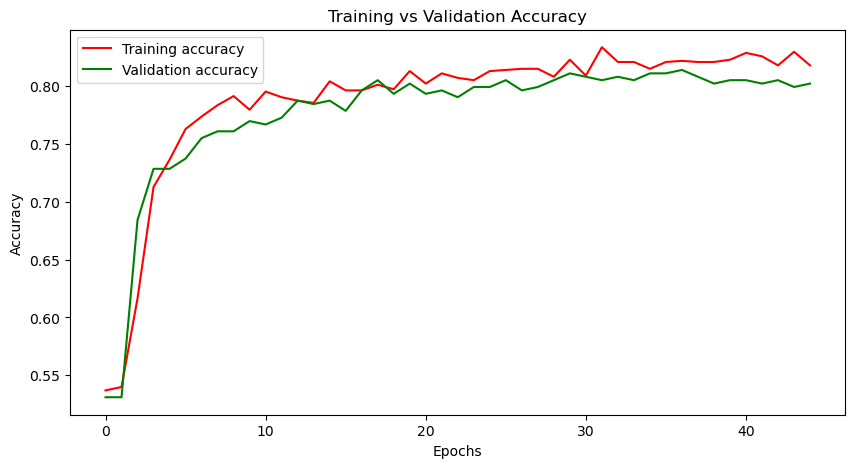

In [ ]:
mass_history_df= pd.DataFrame(mass_history.history)

plt.figure(figsize=(10,5))
plt.plot(mass_history_df.loc[:, ['accuracy']], color= 'red', label= 'Training accuracy')
plt.plot(mass_history_df.loc[:, ['val_accuracy']], color= 'green', label= 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

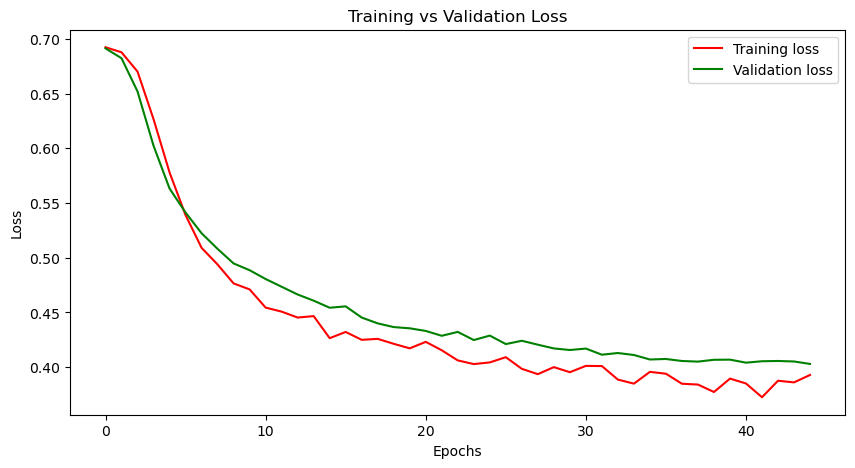

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(mass_history_df.loc[:, ['loss']], color= 'red', label= 'Training loss')
plt.plot(mass_history_df.loc[:, ['val_loss']], color= 'green', label= 'Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## save the model
mass_model.save('Breast_Cancer_Mass_Modelv1')

INFO:tensorflow:Assets written to: Breast_Cancer_Mass_Modelv1/assets


In [ ]:
## load the model
mass_model= tf.keras.models.load_model('Breast_Cancer_Mass_Modelv1')

In [ ]:
## make a prediction
Y_pred_ANN= mass_model.predict(X_test)
Y_pred_ANN

11/11 [==============================] - 0s 369us/step


array([[0.9485148 ],
       [0.5555631 ],
       [0.6294947 ],
       [0.1460969 ],
       [0.02463409],
       [0.52239454],
       [0.9760842 ],
       [0.04199253],
       [0.96156335],
       [0.04140414],
       [0.77500856],
       [0.03677744],
       [0.26212412],
       [0.9651554 ],
       [0.2477654 ],
       [0.44045973],
       [0.9435521 ],
       [0.219085  ],
       [0.40271488],
       [0.00702809],
       [0.02743901],
       [0.07161805],
       [0.20403734],
       [0.7008677 ],
       [0.25039494],
       [0.19387679],
       [0.9800656 ],
       [0.36335847],
       [0.6831567 ],
       [0.3445332 ],
       [0.9639818 ],
       [0.02091489],
       [0.22308472],
       [0.13961266],
       [0.98029023],
       [0.6119958 ],
       [0.6181477 ],
       [0.21651646],
       [0.51399595],
       [0.96165925],
       [0.03954574],
       [0.6471758 ],
       [0.31990477],
       [0.05164801],
       [0.1808861 ],
       [0.23235723],
       [0.12691037],
       [0.024

In [ ]:
Y_pred_ANN= np.where(Y_pred_ANN>0.5, 1, 0)

In [ ]:
print(classification_report(Y_test, Y_pred_ANN))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       183
           1       0.83      0.79      0.81       157

    accuracy                           0.83       340
   macro avg       0.83      0.82      0.82       340
weighted avg       0.83      0.83      0.83       340



In [ ]:
## calculate the confusion matrix
mass_model_CM= confusion_matrix(Y_test, Y_pred_ANN)
mass_model_CM

array([[157,  26],
       [ 33, 124]])

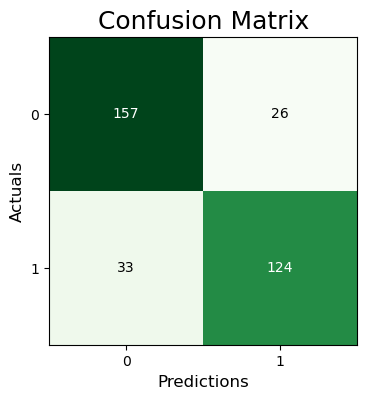

In [ ]:
## plot the confusion matrix plot to see this clearly

fig, ax = plot_confusion_matrix(conf_mat=mass_model_CM, figsize=(4,4), cmap="Greens")
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

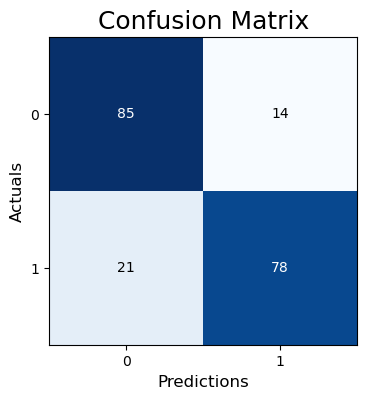

In [ ]:
## plot the matrix as a percentage model

mass_model_CM_perct= mass_model_CM.astype('float')/mass_model_CM.sum(axis=1)[:, np.newaxis]* 100

fig, ax = plot_confusion_matrix(conf_mat=mass_model_CM_perct, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

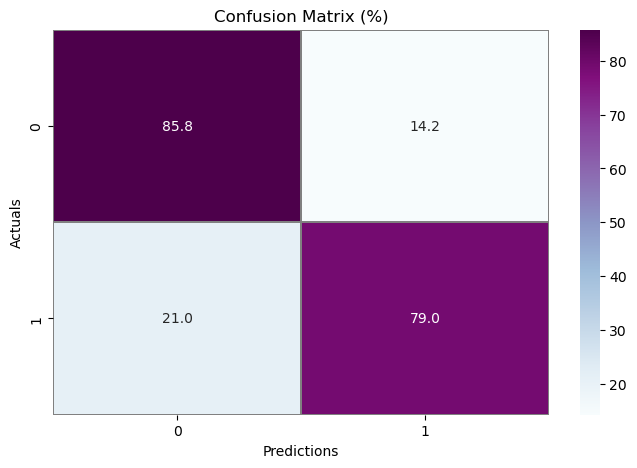

In [ ]:
## another version of confusion matrix with percentage - seaborn works better 

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mass_model_CM_perct, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix (%)')
plt.show()

My true negative = looks very good for predicting 157 correctly out of 183  = 85.8%% correct prediction

My false positive - Type 1 error = is predicting falsely for only 26 to have cancer, but in fact they are all healthy = 14.2% incorrect prediction

My true positive = looks correct for predicting 124 to have cancer correctly out of 157 = 79% correct prediction

My false negative - Type 2 error = is predicting falsely for 33 who actually have cancer as healthy = 21% incorrect prediction

AUC: 0.823866


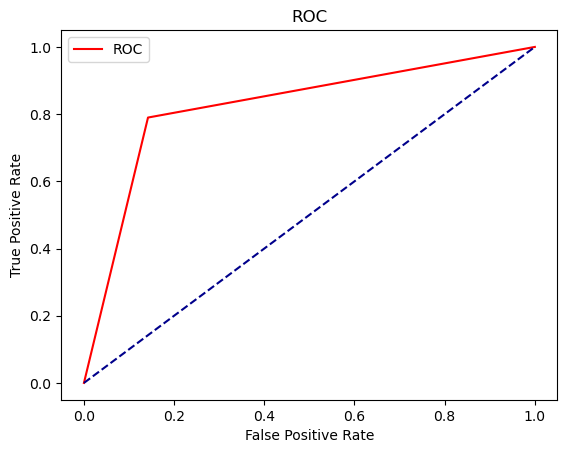

In [ ]:
## plot the Area Under the Curver(AUC)
auc_mod_ANN= roc_auc_score(Y_test, Y_pred_ANN)
print('AUC: %f' %auc_mod_ANN)


fpr, tpr = roc_curve(Y_test, Y_pred_ANN)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

ANN for mass_full_data works very well with an accuracy of 83% and AUC score of 0.828